In [2]:
import os

os.getcwd()


'/home/jovyan/work/UCL/SCUA/quantitive methods/assessment1'

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

import scipy.stats as sps

pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.4f}'.format
plt.style.use('ggplot')

In [11]:
condition_x = pd.read_csv('coursework_data_1.csv')
condition_x.info()
condition_x.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   2008_cases_total  152 non-null    int64
 1   2018_cases_total  152 non-null    int64
 2   clean_air         152 non-null    int64
 3   clean_environ     152 non-null    int64
 4   health_training   152 non-null    int64
 5   school_awareness  152 non-null    int64
 6   media_awareness   152 non-null    int64
 7   sub_counselling   152 non-null    int64
dtypes: int64(8)
memory usage: 9.6 KB


,2008_cases_total,2018_cases_total,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
0,593,763,21000,22000,18000,41000,18000,19000
1,539,773,50000,17000,23000,74000,30000,26000
2,360,527,41000,45000,5000,26000,29000,14000
3,456,494,33000,42000,19000,50000,10000,7000
4,311,367,37000,52000,17000,8000,3000,13000


data1= data["2008_cases_total"]
data2 = data["2018_cases_total"]

min1= min(data1)
min2= min(data2)

max1= max(data1)
max2 = max(data2)

hist_min = int(min(min1,min2)) - 1
hist_max = int(max(max1,max2)) + 2
x_range = [hist_min, hist_max]
y_range = [0,0.002]

n_cols = hist_max - hist_min
print(n_cols)

plt.figure(1)
data['2008_cases_total'].hist(range=x_range, bins=10, density=True)
plt.ylim(y_range)

plt.figure(2)
plt.ylim(y_range)
data['2018_cases_total'].hist(range=x_range, bins=10, density=True)

Text(0.5, 1.0, 'Correlation Matrix')

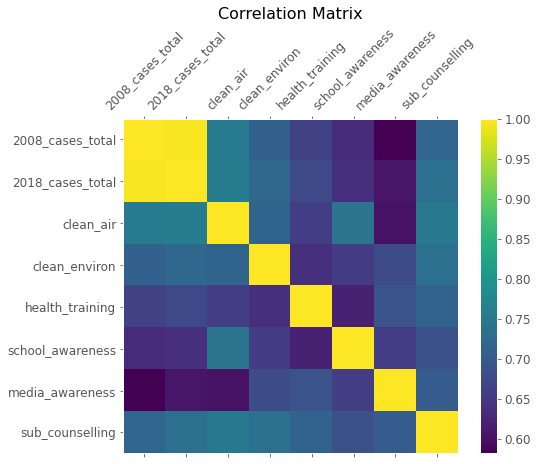

In [15]:

df = condition_x
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(8,6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16)


In [16]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):

    while True:
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()


        vif_df = vif_df.drop('const')

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [17]:
condition_x.columns

Index(['2008_cases_total', '2018_cases_total', 'clean_air', 'clean_environ',
       'health_training', 'school_awareness', 'media_awareness',
       'sub_counselling'],
      dtype='object')

In [18]:
df_predictors_selected_VIF = drop_column_using_vif_(condition_x.drop('2018_cases_total', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['2008_cases_total', 'clean_air', 'clean_environ', 'health_training',
       'school_awareness', 'media_awareness', 'sub_counselling'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
condition_x1 = sm.OLS(endog=condition_x[['2018_cases_total']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
condition_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2018_cases_total   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3639.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          1.34e-158
Time:                        16:23:18   Log-Likelihood:                -881.62
No. Observations:                 152   AIC:                             1779.
Df Residuals:                     144   BIC:                             1803.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               19.6578     11.088      1.773      0.078      -2.258      41.574
2008_cases_total     1.1201      0.012     90.031      0.000       1.095       1.145
clean_air        -1.272e-05      0.000     -0.054      0.957      -0.000       0.000
clean_environ        0.0001      0.000      0.760      0.448      -0.000       0.001
health_training  -5.929e-05      0.000     -0.125      0.900      -0.001       0.001
school_awareness    -0.0005      0.000     -2.296      0.023      -0.001   -6.38e-05
media_awareness      0.0014      0.000      3.745      0.000       0.001       0.002
sub_counselling      0.0014      0.001      2.236      0.027       0.000       0.003
==============================================================================
Omnibus:                        8.391   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.651
Skew:                          -0.395   Prob(JB):                      0.00802
Kurtosis:                       3.948   Cond. No.                     2.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

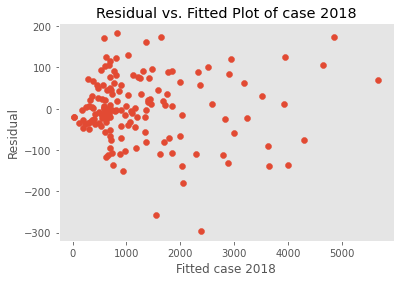

In [20]:
plt.scatter(condition_x1.fittedvalues, condition_x1.resid)
plt.xlabel('Fitted case 2018')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of case 2018')
plt.show()

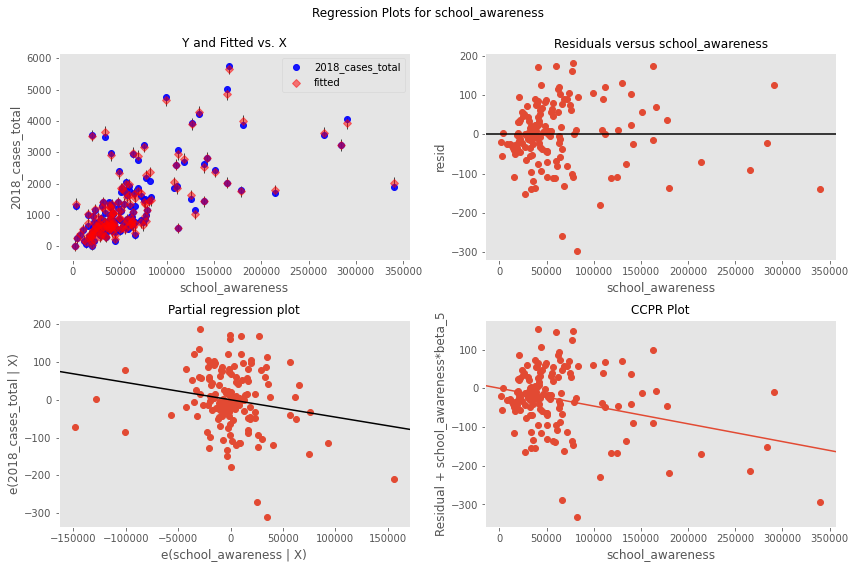

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(condition_x1, 'school_awareness', fig=fig)

In [24]:
df_predictors_selected_VIF_drop = df_predictors_selected_VIF.drop(['clean_air', 'clean_environ', 'health_training'], axis=1)
df_predictors_selected_VIF_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   2008_cases_total  152 non-null    int64
 1   school_awareness  152 non-null    int64
 2   media_awareness   152 non-null    int64
 3   sub_counselling   152 non-null    int64
dtypes: int64(4)
memory usage: 4.9 KB


In [27]:
condition_x2 = sm.OLS(endog=condition_x[['2018_cases_total']], exog=sm.add_constant(df_predictors_selected_VIF_drop)).fit()
condition_x2.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2018_cases_total   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6475.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          4.08e-164
Time:                        17:27:45   Log-Likelihood:                -881.93
No. Observations:                 152   AIC:                             1774.
Df Residuals:                     147   BIC:                             1789.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               19.9928     10.934      1.828      0.070      -1.616      41.602
2008_cases_total     1.1223      0.011    104.027      0.000       1.101       1.144
school_awareness    -0.0004      0.000     -2.451      0.015      -0.001   -8.62e-05
media_awareness      0.0014      0.000      4.273      0.000       0.001       0.002
sub_counselling      0.0015      0.001      2.620      0.010       0.000       0.003
==============================================================================
Omnibus:                        9.525   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               11.696
Skew:                          -0.415   Prob(JB):                      0.00289
Kurtosis:                       4.077   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

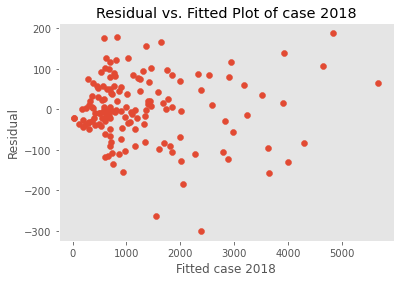

In [30]:
plt.scatter(condition_x2.fittedvalues, condition_x2.resid)
plt.xlabel('Fitted case 2018')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of case 2018')
plt.show()

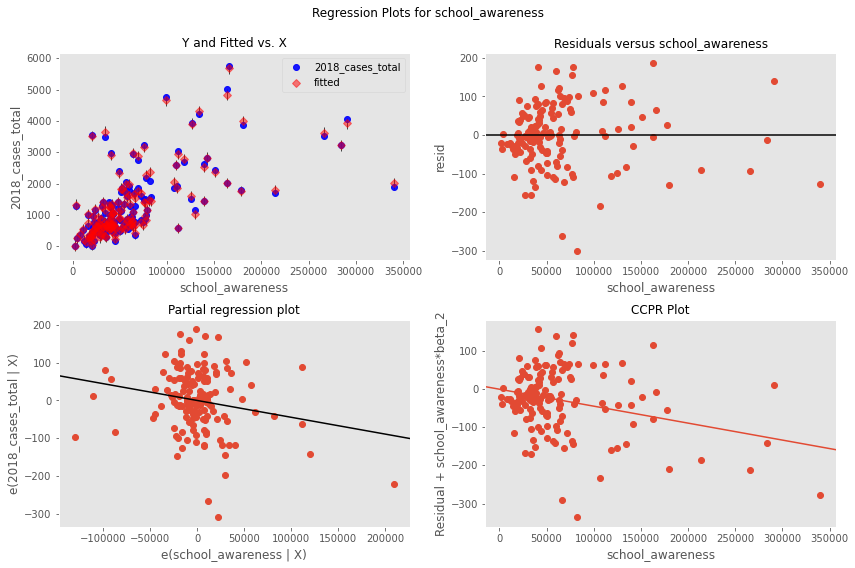

In [31]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(condition_x2, 'school_awareness', fig=fig)